In [8]:
import pandas as pd

# 1. Read the CSV file
df = pd.read_csv('Car_sales.csv')

# 1. Read top five values
print("1. Top five values:")
df.head()




1. Top five values:


,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


In [10]:
# 2. Print dataframe info and data types of each column
print("2. Dataframe info and data types:")
print(df.info())
print("\n")

2. Dataframe info and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: flo

In [12]:
print(f"3. Number of rows and columns: {df.shape}")
print("\n")


3. Number of rows and columns: (157, 15)




In [14]:
initial_shape = df.shape
df.drop_duplicates(inplace=True)
final_shape = df.shape


In [16]:
print(f"5. Rows/columns before dropping duplicates: {initial_shape}")
print(f"   Rows/columns after dropping duplicates: {final_shape}")
print("\n")

5. Rows/columns before dropping duplicates: (157, 15)
   Rows/columns after dropping duplicates: (157, 15)




In [18]:
# 6. Print summary statistics for numerical variables
print("6. Summary statistics for numerical variables:")
print(df.describe())
print("\n")

# 7. Print number of missing values in each column
print("7. Missing values in each column:")
print(df.isnull().sum())
print("\n")


6. Summary statistics for numerical variables:
       Sales in thousands
count          157.000000
mean            52.998076
std             68.029422
min              0.110000
25%             14.114000
50%             29.450000
75%             67.956000
max            540.561000


7. Missing values in each column:
Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64




In [26]:
import numpy as np
df=df.replace('.',np.nan)
df.isnull().sum()

Manufacturer            0
Model                   0
Sales in thousands      0
4-year resale value    36
Vehicle type            0
Price in thousands      2
Engine size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb weight             2
Fuel capacity           1
Fuel efficiency         3
Latest Launch           0
dtype: int64

In [28]:
most_missing = df.isnull().sum().idxmax()
df.drop(columns=[most_missing], inplace=True)
print(f"8. Dropped column with most missing values: {most_missing}")
print("\n")

8. Dropped column with most missing values: 4-year resale value




In [30]:
# 9. Drop the rows with categorical missing values
categorical_cols = df.select_dtypes(include=['object']).columns
df.dropna(subset=categorical_cols, inplace=True)
print("9. Dropped rows with categorical missing values")
print("\n")

9. Dropped rows with categorical missing values




In [34]:
df.dtypes

Manufacturer           object
Model                  object
Sales in thousands    float64
Vehicle type           object
Price in thousands     object
Engine size            object
Horsepower             object
Wheelbase              object
Width                  object
Length                 object
Curb weight            object
Fuel capacity          object
Fuel efficiency        object
Latest Launch          object
dtype: object

In [36]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales in thousands    0
Vehicle type          0
Price in thousands    0
Engine size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb weight           0
Fuel capacity         0
Fuel efficiency       0
Latest Launch         0
dtype: int64

In [38]:
sorted_by_price = df.sort_values(by='Price in thousands', ascending=False)

In [40]:
sorted_by_price.head(1)

,Manufacturer,Model,Sales in thousands,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
62,Hyundai,Accent,41.184,Passenger,9.699,1.5,92,96.1,65.7,166.7,2.24,11.9,31,9-Oct-14


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




def min_max(df,column):
  min_val=df[column].min()
  max_val=df[column].max()
  return min_val,max_val

column='Sales in thousands'
print(min_max(df,column))
    

(0.11, 540.561)


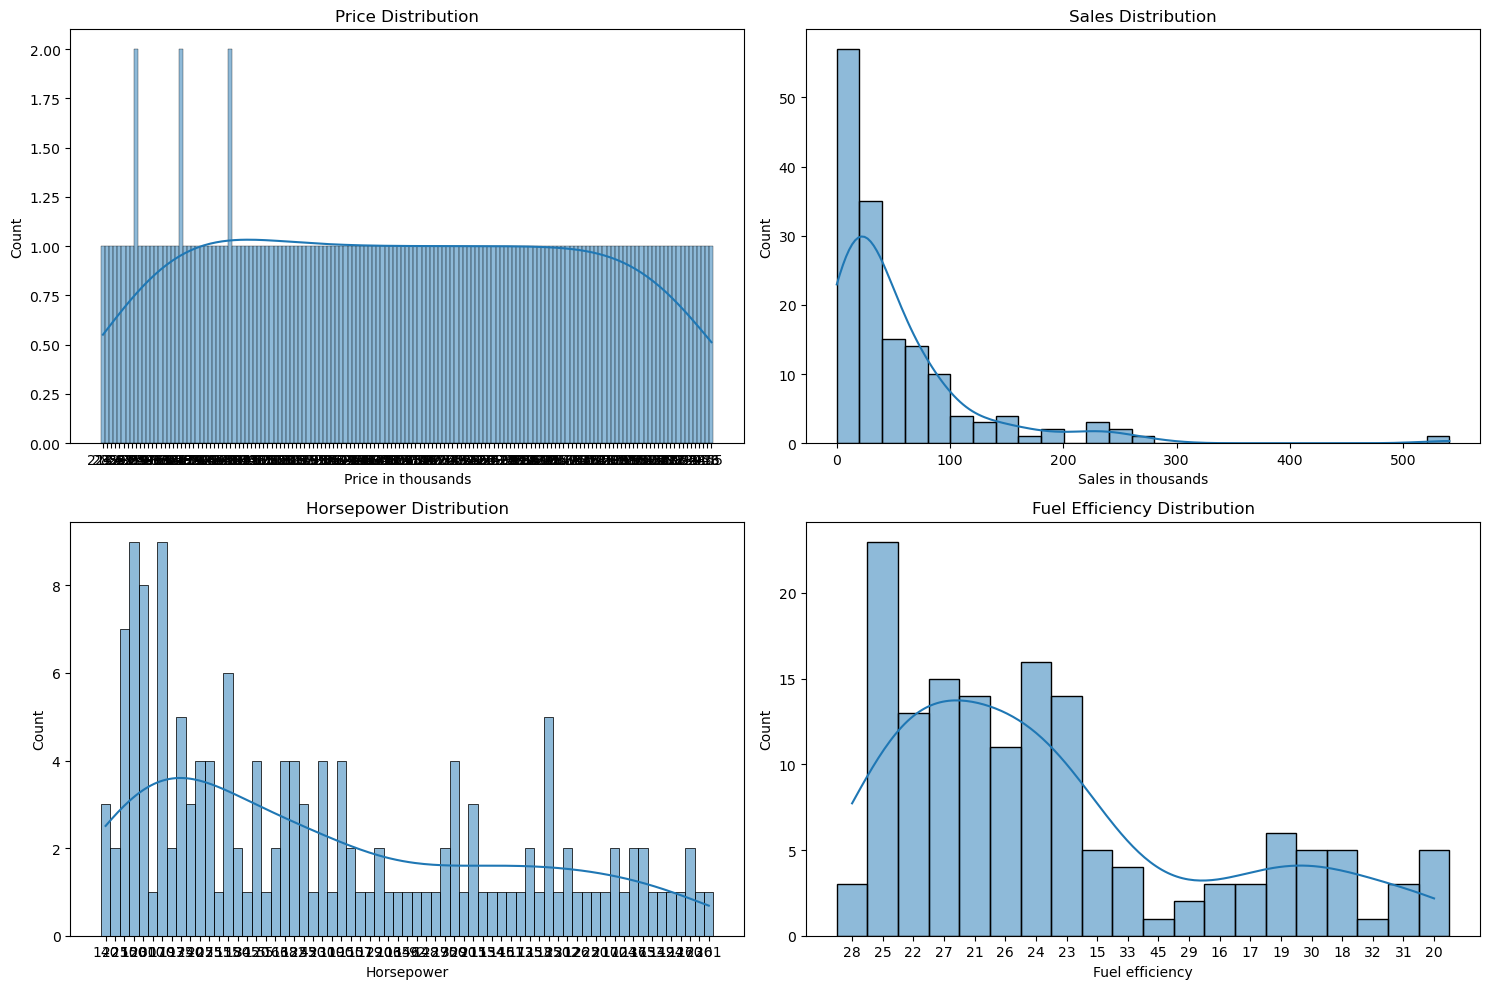

In [61]:
import seaborn as sns
# 14. Plot histograms
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['Price in thousands'], kde=True)
plt.title('Price Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Sales in thousands'], kde=True)
plt.title('Sales Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Horsepower'], kde=True)
plt.title('Horsepower Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Fuel efficiency'], kde=True)
plt.title('Fuel Efficiency Distribution')

plt.tight_layout()
plt.show()


In [65]:
# 16. Count by manufacturer
manufacturer_counts = df['Manufacturer'].value_counts()
print("\n16. Count by Manufacturer:")
print(manufacturer_counts)


16. Count by Manufacturer:
Manufacturer
Ford             11
Dodge            10
Chevrolet         9
Mercedes-Benz     9
Toyota            9
Nissan            7
Mitsubishi        7
Pontiac           6
Volkswagen        6
Mercury           6
Lexus             6
Chrysler          6
Volvo             6
Honda             5
Oldsmobile        5
Saturn            5
Buick             4
Plymouth          4
Cadillac          4
Audi              3
BMW               3
Acura             3
Lincoln           3
Porsche           3
Jeep              3
Hyundai           3
Saab              2
Subaru            2
Jaguar            1
Infiniti          1
Name: count, dtype: int64


In [67]:
df['Length']=df['Length'].astype('float64')

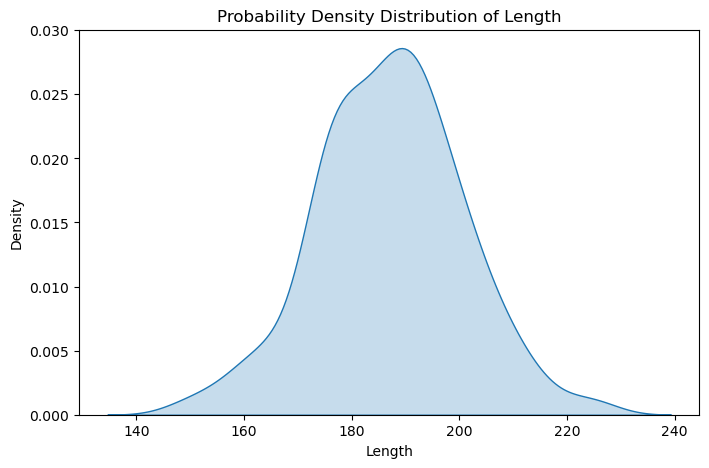

In [71]:
# 15. Probability density distribution of length
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Length'], fill=True)
plt.title('Probability Density Distribution of Length')
plt.show()

In [73]:
numerical_df = df.select_dtypes(include=['number'])
print("\n17. Numerical variables:")
print(numerical_df.columns.tolist())



17. Numerical variables:
['Sales in thousands', 'Length']


In [75]:
# 18. Correlation coefficient of price and sales
correlation = df['Price in thousands'].corr(df['Sales in thousands'])
print(f"\n18. Correlation between Price and Sales: {correlation:.2f}")


18. Correlation between Price and Sales: -0.30


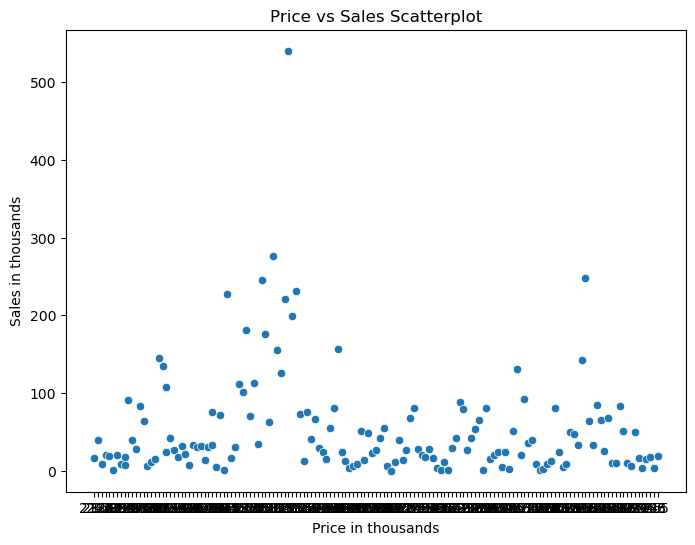

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price in thousands', y='Sales in thousands', data=df)
plt.title('Price vs Sales Scatterplot')
plt.show()

20. Pair plot of numerical variables:


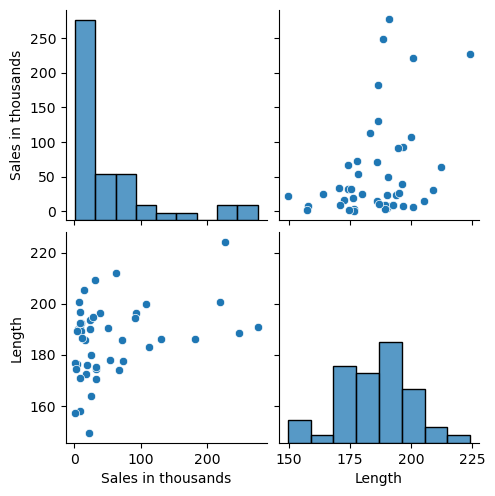

In [79]:
# 20. Pair plot of numerical variables
print("20. Pair plot of numerical variables:")
numerical_cols = df.select_dtypes(include=['number']).columns
sns.pairplot(df[numerical_cols].sample(frac=0.3))  # Sampling for faster plotting
plt.show()

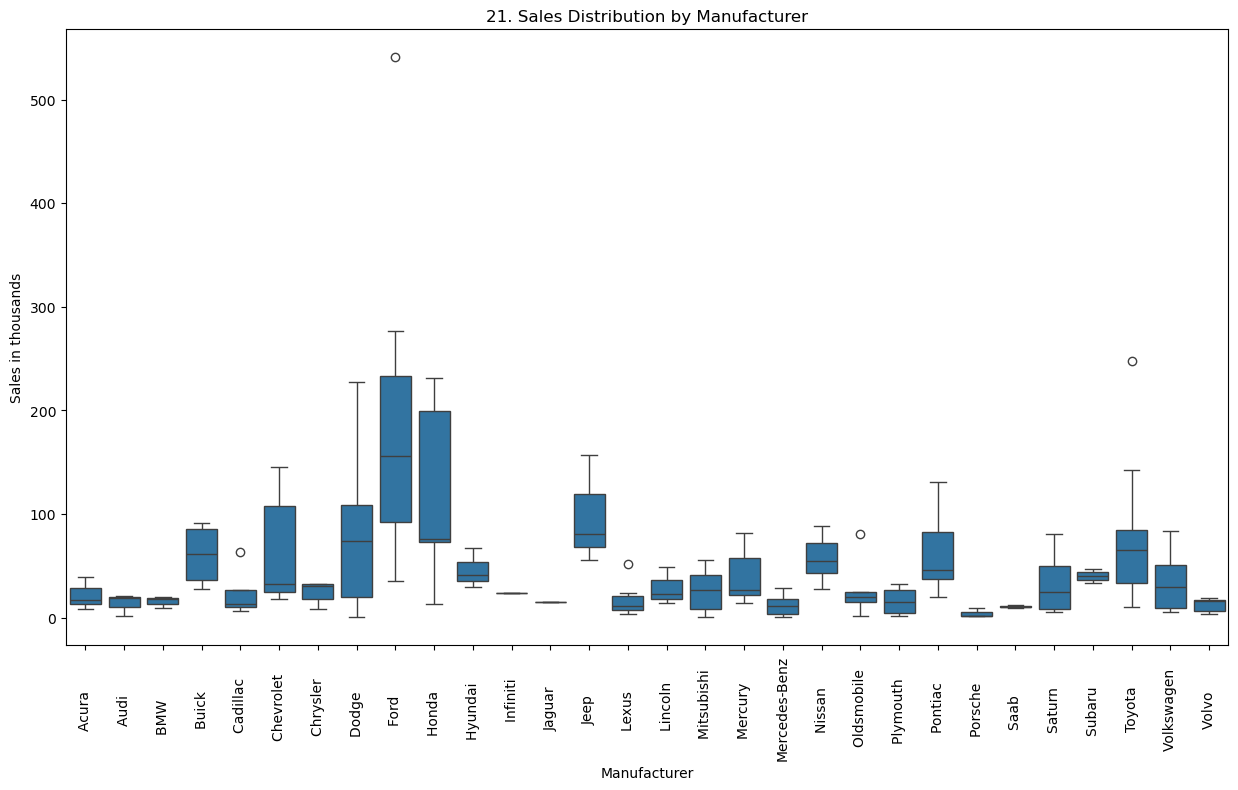

In [81]:
# 21. Boxplot of sales by manufacturer
plt.figure(figsize=(15, 8))
sns.boxplot(x='Manufacturer', y='Sales in thousands', data=df)
plt.xticks(rotation=90)
plt.title('21. Sales Distribution by Manufacturer')
plt.show()


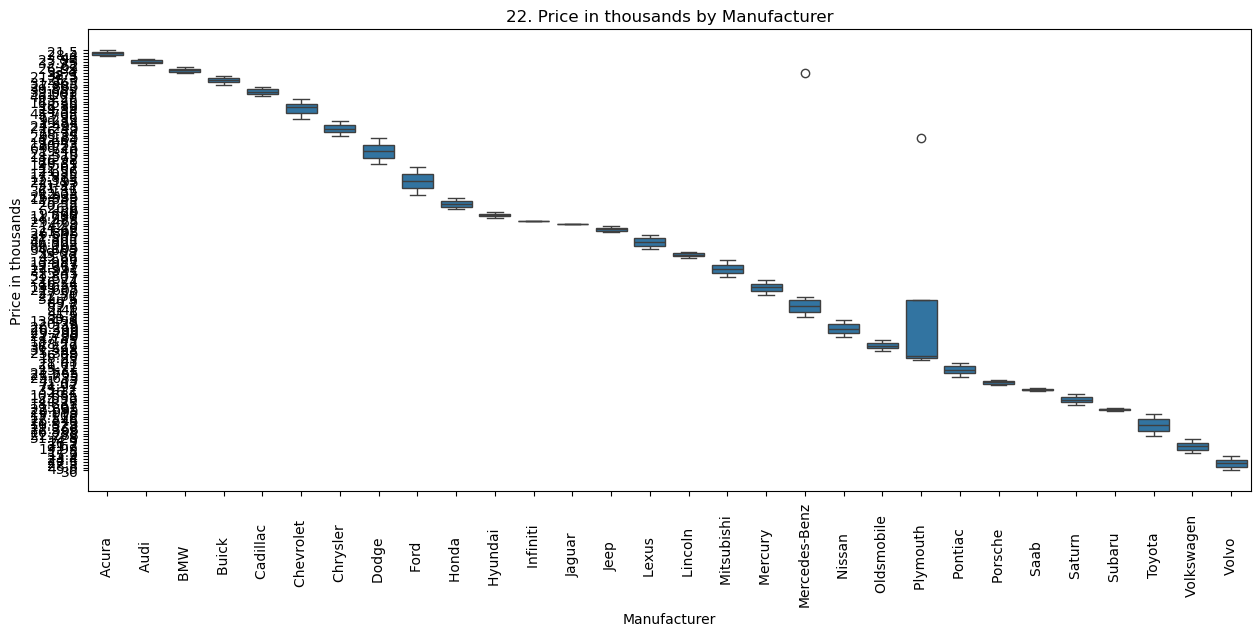

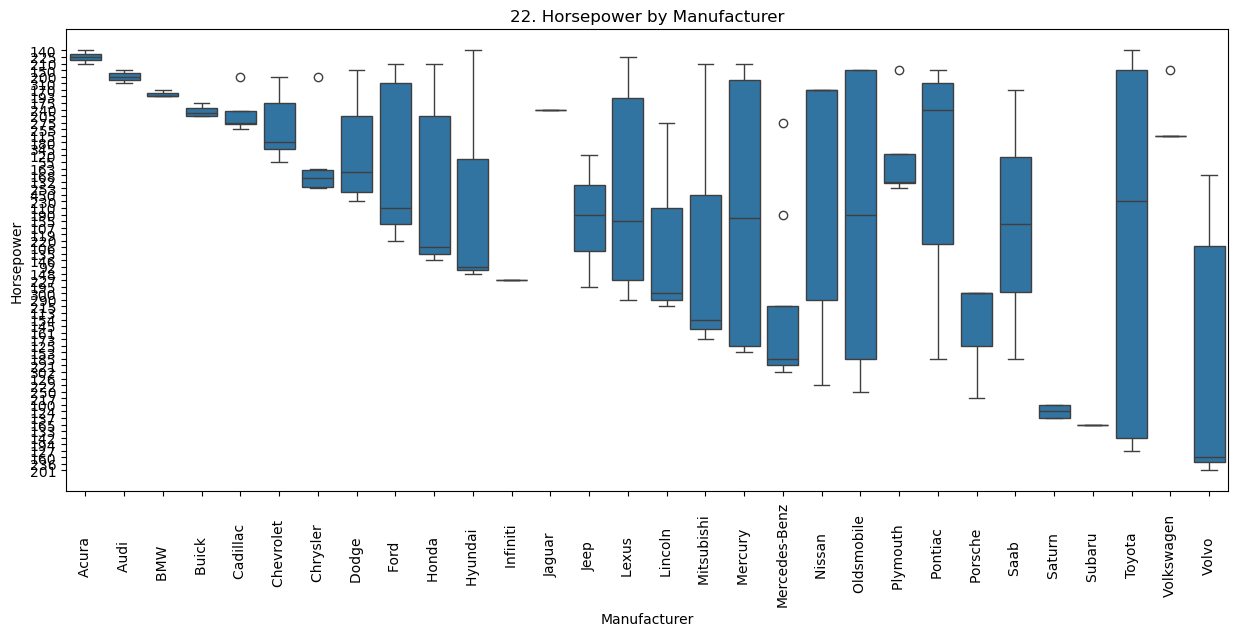

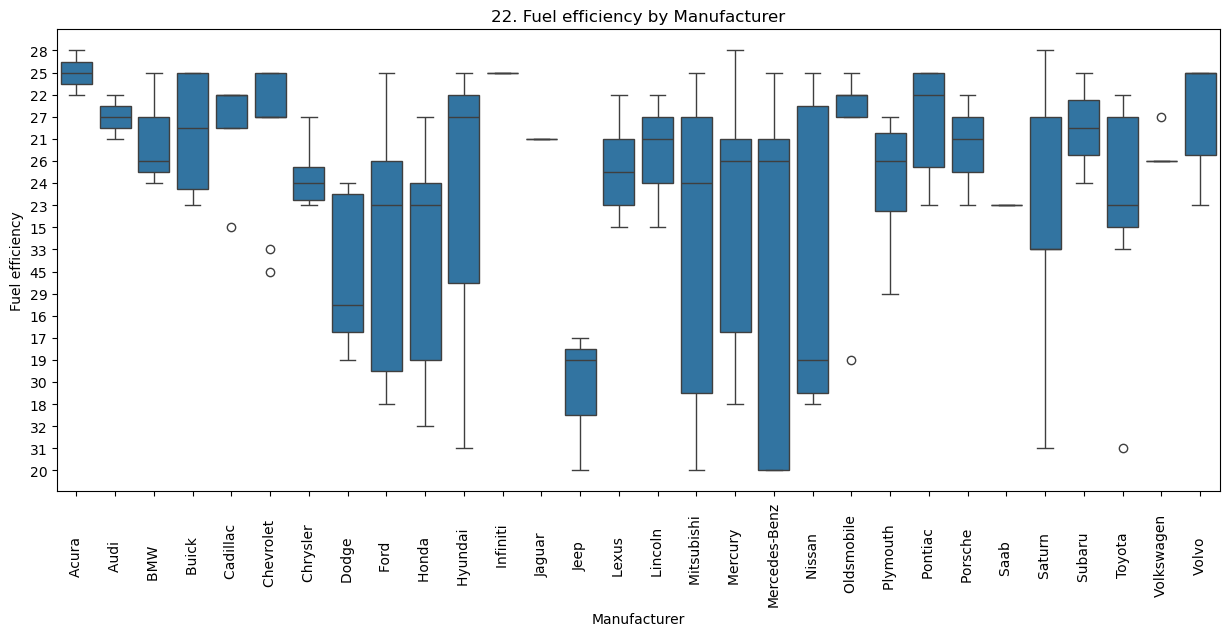

In [83]:
# 22. Boxplot of other numerical variables by manufacturer
numerical_vars = ['Price in thousands', 'Horsepower', 'Fuel efficiency']
for var in numerical_vars:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='Manufacturer', y=var, data=df)
    plt.xticks(rotation=90)
    plt.title(f'22. {var} by Manufacturer')
    plt.show()

In [85]:
# 23. Divide data into input (X) and output (y)
X = df.drop('Sales in thousands', axis=1)
y = df['Sales in thousands']

In [89]:
# 24. Label encode categorical variables (except Vehicle type)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns.drop('Vehicle type')
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])


In [91]:
df.dtypes

Manufacturer           object
Model                  object
Sales in thousands    float64
Vehicle type           object
Price in thousands     object
Engine size            object
Horsepower             object
Wheelbase              object
Width                  object
Length                float64
Curb weight            object
Fuel capacity          object
Fuel efficiency        object
Latest Launch          object
dtype: object

In [97]:
# 25. One-hot encode Vehicle type
X = pd.get_dummies(X, columns=['Vehicle type'], prefix='Type')


In [99]:
X.dtypes

Manufacturer            int64
Model                   int64
Price in thousands      int64
Engine size             int64
Horsepower              int64
Wheelbase               int64
Width                   int64
Length                float64
Curb weight             int64
Fuel capacity           int64
Fuel efficiency         int64
Latest Launch           int64
Type_Car                 bool
Type_Passenger           bool
dtype: object

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [103]:
# 27. Feature scaling on numerical variables
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['number']).columns


In [105]:
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])